## **Dynamic Programming - Memoization**

https://youtu.be/oBt53YbR9Kk

### **Grid Traveller**

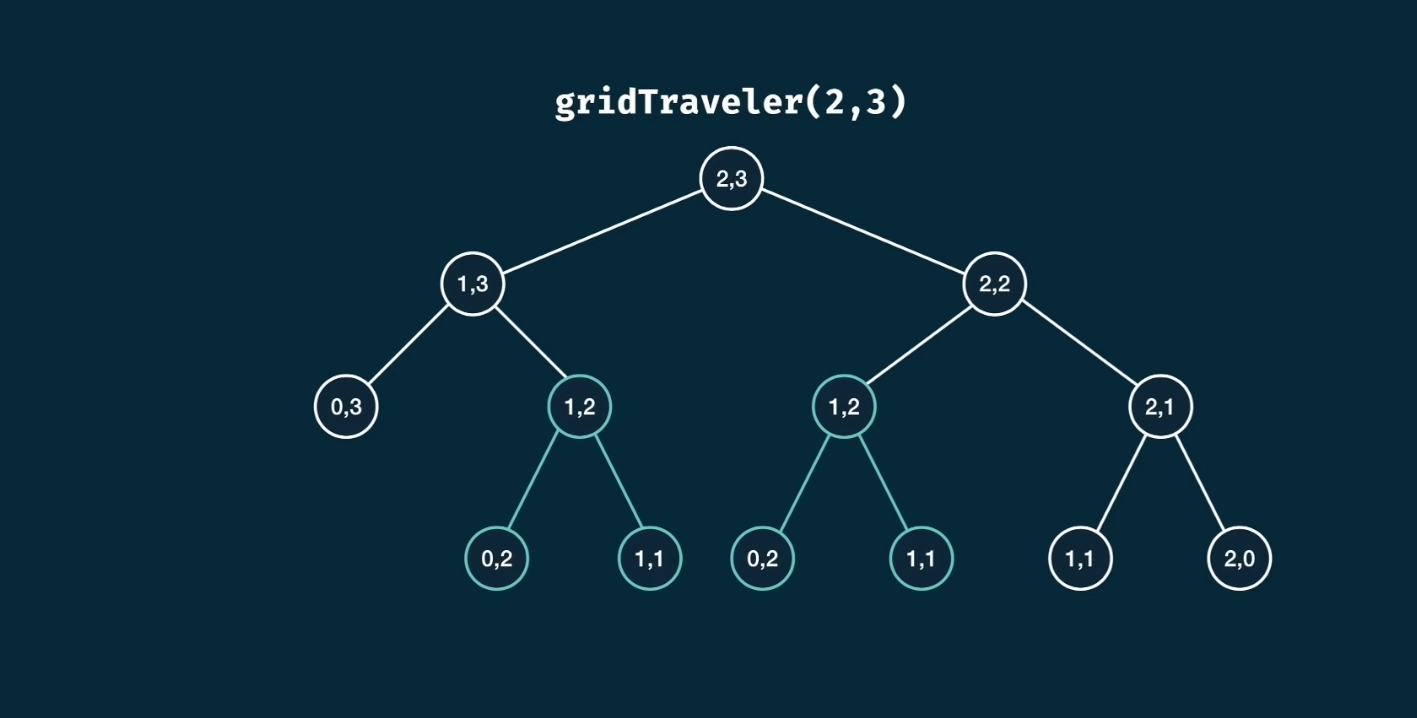

In [1]:
def grid_traveller(m, n):
    """Function to return how many ways a person can travel from start to end in m x n grid"""
    if m == 1 and n == 1:
        return 1
    if m == 0 or n == 0:
        return 0
    return grid_traveller(m - 1, n) + grid_traveller(m , n -1)

In [2]:
grid_traveller(1,1) # Output : 1

1

In [3]:
grid_traveller(1, 0) # output : 0

0

In [7]:
print(grid_traveller(2, 3)) # output : 3
print(grid_traveller(3, 2)) # output : 3
print(grid_traveller(3, 3)) # output: 6

3
3
6


In [9]:
#print(grid_traveller(18, 18)) -> is taking very long time

### **Grid Traveller - Memoization**

In [19]:
def grid_traveller_memo(m, n, memo = {}):
    """Function to return how many ways a person can travel from start to end in m x n grid using memoization"""
    if (m,n) in memo:
        return memo[(m,n)]
    if m == 0 or n == 0: 
        return 0
    if m == 1 and n == 1:
        return 1
    memo[(m,n)] = grid_traveller_memo(m - 1, n, memo) + grid_traveller_memo(m , n -1, memo)
    return memo[(m,n)]

In [20]:
grid_traveller_memo(1,1) # Output : 1

1

In [21]:
grid_traveller_memo(1, 0) # output : 0

0

In [22]:
print(grid_traveller_memo(2, 3)) # output : 3
print(grid_traveller_memo(3, 2)) # output : 3
print(grid_traveller_memo(3, 3)) # output: 6

3
3
6


In [23]:
print(grid_traveller_memo(18, 18)) # was taking very long time without memoization

2333606220


### **Memoization Steps**

1. Find the working solution:
    * Visualize the problem as tree
    * Implement the tree using recursion. Include all base cases
    * Test the solution with various inputs
2. Find the efficient solution:
    * Add memoization dictionary
    * Add base case to return memoization values based on key
    * Store return values in memoization in dictionary

### CANSUM

Given a set of non-negative integers and a value sum, the task is to check if there is a subset of the given set whose sum is equal to the given sum. 

Examples:

Input: set[] = {3, 34, 4, 12, 5, 2}, sum = 9\
Output: True\
Explanation: There is a subset (4, 5) with sum 9.


Input: set[] = {3, 34, 4, 12, 5, 2}, sum = 30\
Output: False\
Explanation: There is no subset that add up to 30.

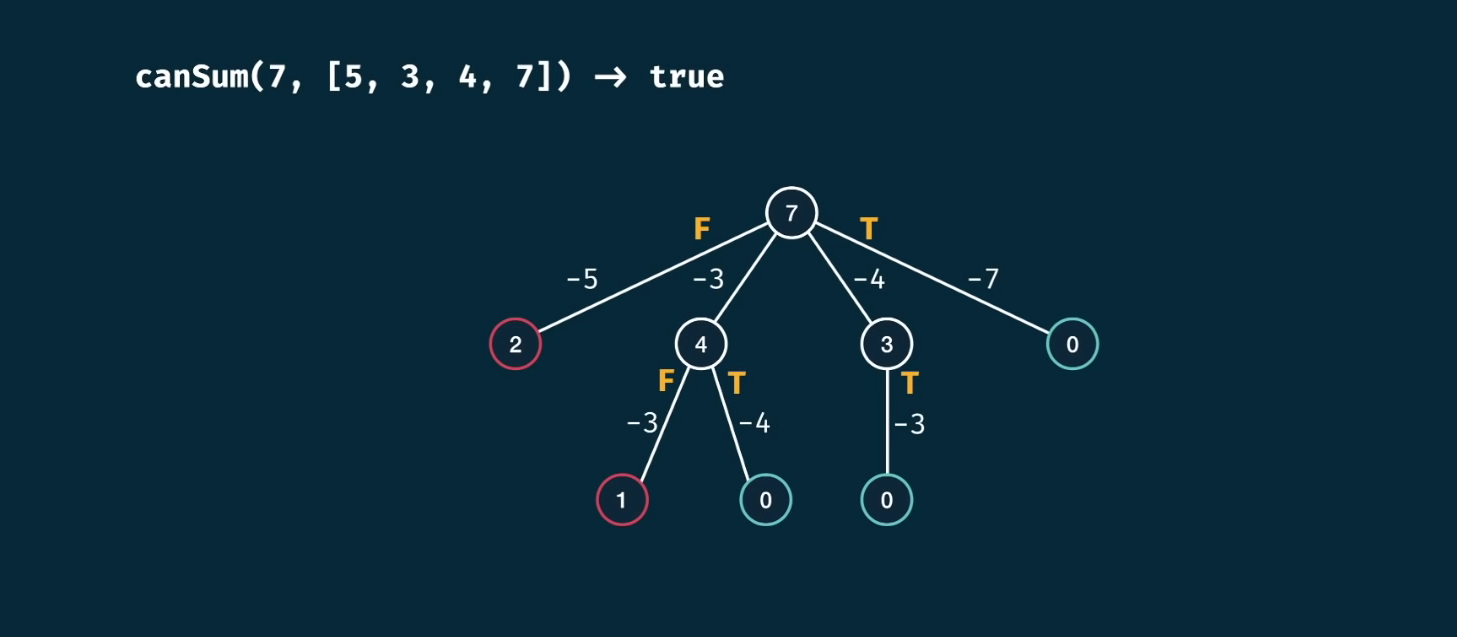

In [1]:
def canSum(targetSum, numbers):
    """Function to check if targetSum is achieved thru given set of numbers """
    if targetSum == 0:
        return True
    if targetSum < 0:
        return False
    for n in numbers:
        remainder = targetSum - n
        if (canSum(remainder, numbers) == True):
            return True
    return False

In [3]:
print(canSum(7,[2,3]))
print(canSum(7,[5,3,4,7]))
print(canSum(7,[2,4]))
print(canSum(8,[2,3,5]))
#print(canSum(300,[7,14])) # This one is taking lot of time since depth of tree is very large


True
True
False
True


### Complexity:
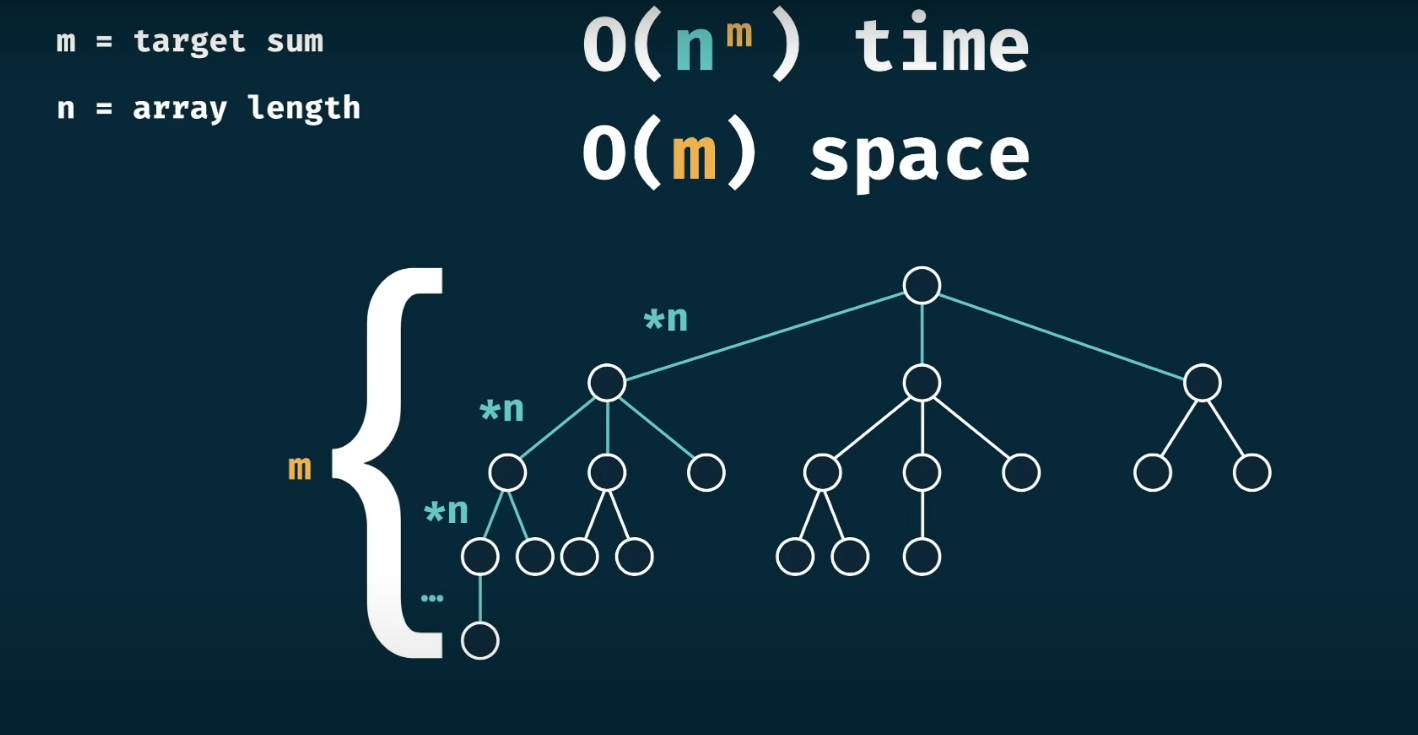

### CANSUM Problem using Memoization

In [30]:
def canSum_memo(targetSum, numbers, memo = {}):
    """Function to check if numbers can sum to targetSum using memoization"""
    if targetSum in memo:
        return memo[targetSum]
    if targetSum == 0:
        return True
    if targetSum < 0:
        return False
    for n in numbers:
        remainder = targetSum - n
        #print(remainder)
        if (canSum_memo(remainder, numbers, memo) == True):
            memo[targetSum] = True
            return True

    memo[targetSum] = False
    return False

In [31]:
print(canSum_memo(7,[2,3],{}))
print(canSum_memo(7,[5,3,4,7],{}))
print(canSum_memo(7,[2,4],{}))
print(canSum_memo(8,[2,3,5],{}))
print(canSum_memo(300,[7,14],{})) # This one is taking lot of time since depth of tree is very large

True
True
False
True
False


In [25]:
print(canSum_memo(7,[2,4]))

True


### Complexity with Memoization

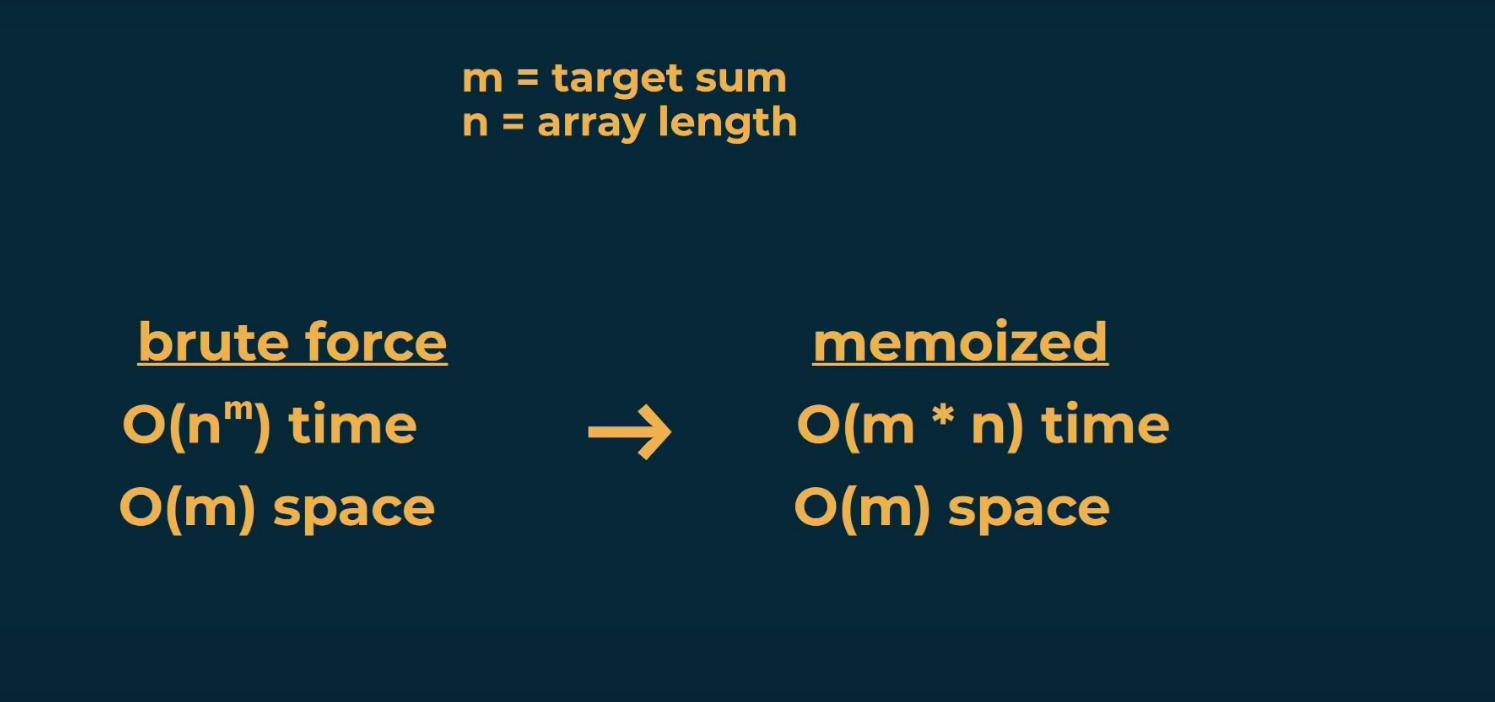

### **HowSum**
Given an array of integers and a sum, the task is to print all subsets of the given array with a sum equal to a given sum.

Input : arr[] = {2, 3, 5, 6, 8, 10}\
        sum = 10\
Output : 5 2 3\
         2 8\
         10

Input : arr[] = {1, 2, 3, 4, 5}\
        sum = 10\
Output : 4 3 2 1 \
         5 3 2 \
         5 4 1 

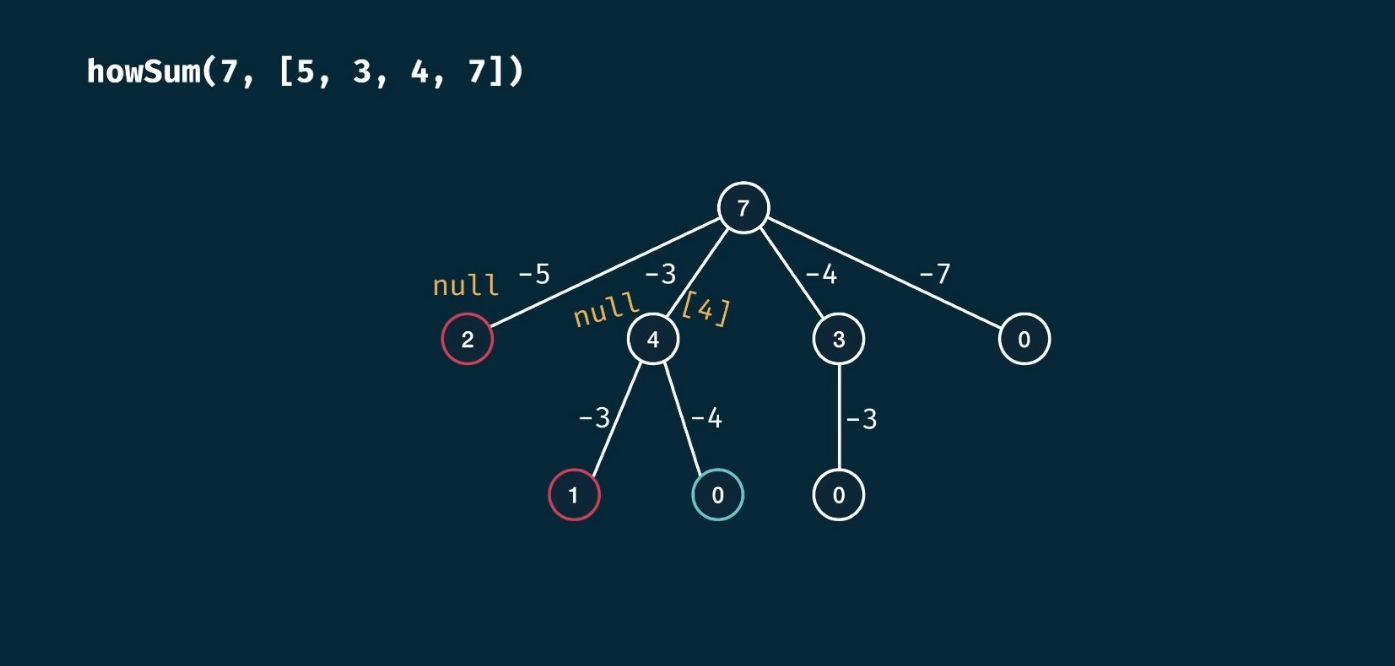

### HowSum

In [16]:
def how_sum(target_sum, numbers):
    """Function to return sum of elements that are matching to target_sum"""
    if target_sum == 0:
        return []
    if target_sum < 0:
        return None
    for n in numbers:
        remainder = target_sum - n
        remainder_result = how_sum(remainder, numbers)
        if remainder_result != None:
            #print(remainder_result)
            return remainder_result + [n]
    return None     
        

In [22]:
print(how_sum(7,[2,3]))
print(how_sum(7,[5,3,4,7]))
print(how_sum(7,[2,4]))
print(how_sum(8,[2,3,5]))
#print(how_sum(300,[7,14])) # This one is taking lot of time since depth of tree is very large

[3, 2, 2]
[4, 3]
None
[2, 2, 2, 2]


### Time and Space complexity without Memoization
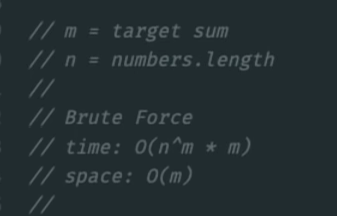

### HowSum using memoization

In [33]:
def how_sum_memo(target_sum, numbers, memo = {}):
    """Function to return sum of elements that are matching to target_sum using memoization"""
    if target_sum in memo:
        return memo[target_sum]
    if target_sum == 0:
        return []
    if target_sum < 0:
        return None
    for n in numbers:
        remainder = target_sum - n
        remainder_result = how_sum_memo(remainder, numbers, memo)
        if remainder_result != None:
            memo[target_sum] = remainder_result + [n]
            return memo[target_sum]

    memo[target_sum] = None
    return None

In [34]:
print(how_sum_memo(7,[2,3],{}))
print(how_sum_memo(7,[5,3,4,7],{}))
print(how_sum_memo(7,[2,4],{}))
print(how_sum_memo(8,[2,3,5],{}))
print(how_sum_memo(300,[7,14],{})) # This one is taking lot of time since depth of tree is very large

[3, 2, 2]
[4, 3]
None
[2, 2, 2, 2]
None


### Time and Space Complexity with Memoization
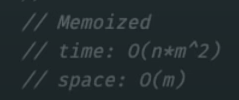